In [22]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [23]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,region,population,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [24]:
Xx = dataset.iloc[:, [1,*range(3,10)]]
Xx.head(10)

,region,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0.0,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,0.0,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,0.0,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,0.0,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,0.0,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,0.0,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,0.0,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,0.0,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,0.0,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,0.0,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [25]:
X = dataset.iloc[:, [1,*range(3,10)]].values
Y = dataset['population'].values

In [26]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [27]:

input_layer_size = 8

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 50
second_hidden_layer_size = 50

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 100
batch_size = 16

In [28]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [29]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [31]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/100
181/181 [==============================] - 0s 1ms/step - loss: 0.6905 - mean_absolute_error: 0.7493 - mean_squared_error: 0.6905 - val_loss: 0.1583 - val_mean_absolute_error: 0.3374 - val_mean_squared_error: 0.1583
Epoch 2/100
181/181 [==============================] - 0s 450us/step - loss: 0.0936 - mean_absolute_error: 0.2464 - mean_squared_error: 0.0936 - val_loss: 0.0981 - val_mean_absolute_error: 0.2445 - val_mean_squared_error: 0.0981
Epoch 3/100
181/181 [==============================] - 0s 473us/step - loss: 0.0729 - mean_absolute_error: 0.2059 - mean_squared_error: 0.0729 - val_loss: 0.0627 - val_mean_absolute_error: 0.2000 - val_mean_squared_error: 0.0627
Epoch 4/100
181/181 [==============================] - 0s 556us/step - loss: 0.0413 - mean_absolute_error: 0.1647 - mean_squared_error: 0.0413 - val_loss: 0.0433 - val_mean_absolute_error: 0.1785 - val_mean_squared_error: 0.0433
Epoch 5/100
181/181 [====================

181/181 [==============================] - 0s 139us/step - loss: 0.0079 - mean_absolute_error: 0.0685 - mean_squared_error: 0.0079 - val_loss: 0.0217 - val_mean_absolute_error: 0.0971 - val_mean_squared_error: 0.0217
Epoch 37/100
181/181 [==============================] - 0s 385us/step - loss: 0.0075 - mean_absolute_error: 0.0664 - mean_squared_error: 0.0075 - val_loss: 0.0221 - val_mean_absolute_error: 0.0954 - val_mean_squared_error: 0.0221
Epoch 38/100
181/181 [==============================] - 0s 142us/step - loss: 0.0077 - mean_absolute_error: 0.0664 - mean_squared_error: 0.0077 - val_loss: 0.0219 - val_mean_absolute_error: 0.0974 - val_mean_squared_error: 0.0219
Epoch 39/100
181/181 [==============================] - 0s 374us/step - loss: 0.0078 - mean_absolute_error: 0.0677 - mean_squared_error: 0.0078 - val_loss: 0.0214 - val_mean_absolute_error: 0.0978 - val_mean_squared_error: 0.0214
Epoch 40/100
181/181 [==============================] - 0s 151us/step - loss: 0.0075 - mean_a

Epoch 72/100
181/181 [==============================] - 0s 335us/step - loss: 0.0065 - mean_absolute_error: 0.0614 - mean_squared_error: 0.0065 - val_loss: 0.0201 - val_mean_absolute_error: 0.0913 - val_mean_squared_error: 0.0201
Epoch 73/100
181/181 [==============================] - 0s 142us/step - loss: 0.0064 - mean_absolute_error: 0.0610 - mean_squared_error: 0.0064 - val_loss: 0.0198 - val_mean_absolute_error: 0.0909 - val_mean_squared_error: 0.0198
Epoch 74/100
181/181 [==============================] - 0s 134us/step - loss: 0.0062 - mean_absolute_error: 0.0607 - mean_squared_error: 0.0062 - val_loss: 0.0196 - val_mean_absolute_error: 0.0880 - val_mean_squared_error: 0.0196
Epoch 75/100
181/181 [==============================] - 0s 328us/step - loss: 0.0060 - mean_absolute_error: 0.0592 - mean_squared_error: 0.0060 - val_loss: 0.0198 - val_mean_absolute_error: 0.0871 - val_mean_squared_error: 0.0198
Epoch 76/100
181/181 [==============================] - 0s 139us/step - loss: 0.

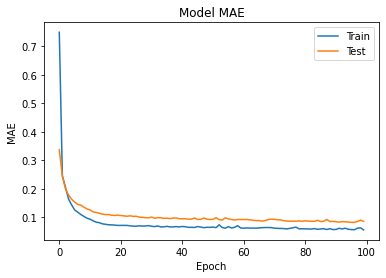

In [32]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

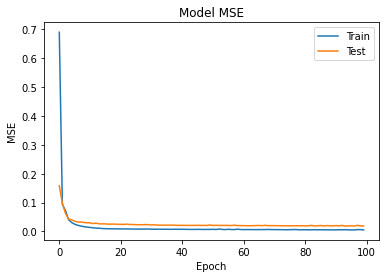

In [33]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [34]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

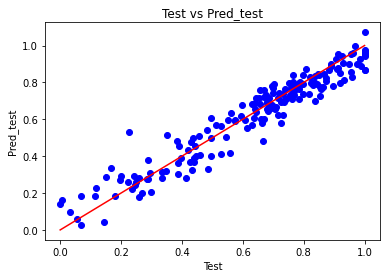

In [35]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

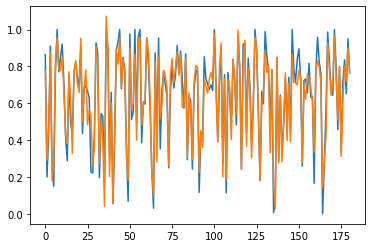

In [36]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [37]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

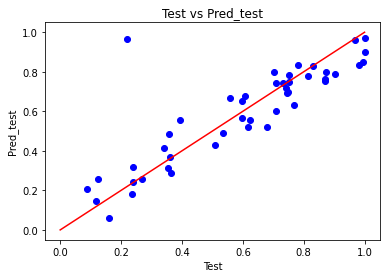

In [38]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

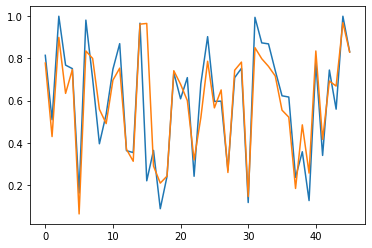

In [39]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [41]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.0715961606616499
0.13852088761493203


In [42]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)

k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9812412261962891, p = 0.015487770549952984
Test k = 0.6996245384216309, p = 2.1178431452995028e-08


In [43]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.8342310786247253, p_s = 7.69036120592051e-15
k_n = 182.957093180941, p_n = 1.8679790588747474e-40


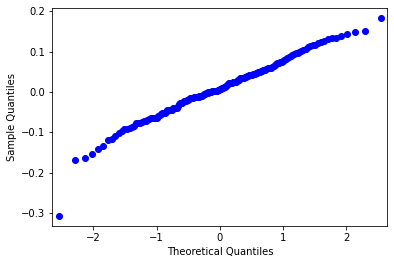

In [44]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

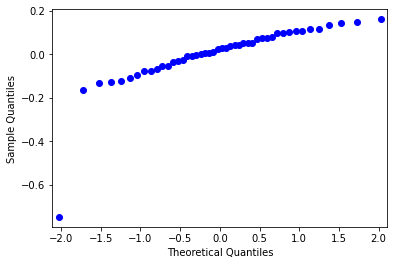

In [45]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

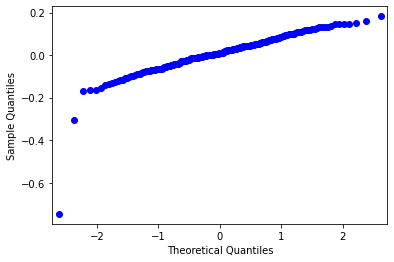

In [46]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

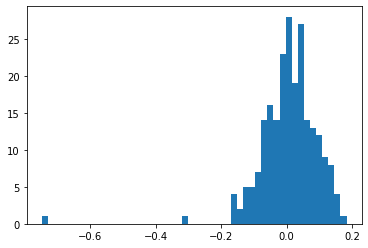

In [47]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [48]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SNN1.h5')